<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S5_1_1_Conna%C3%AEtre_ses_clients_KMeans_Exercice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connaître ses clients

Une des applications les plus courantes du KMeans est d’apprendre à connaître ses clients. Prenez un dataset très simple qui est Mall Customers pour essayer de découvrir des segmentations clients.


0. Importez les librairies usuelles 

In [0]:
import seaborn as sns
import pandas as pd
import numpy as np
#import matplotlib as plt
import matplotlib.pyplot as plt

1. Importez votre dataset ```Mall_Customers.csv```

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
df = pd.read_csv('/content/drive/My Drive/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


2. Enlevez la variable ```CustomerID``` de votre dataset 

In [17]:
df.drop("CustomerID", axis = 1,  inplace=True)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


3. Dummyfiez vos variables catégoriques 

In [18]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


4. Nous allons construire nos clusters mais pour cela, nous avons besoin de connaître le nombre optimum de clusters dont on a besoin. Utilisez tout d'abord la méthode ```Elbow``` pour voir si on peut voir combien il nous faudra prendre comme valeur pour ```k```

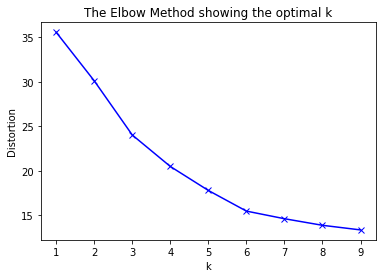

In [19]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
X=df
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)#.fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

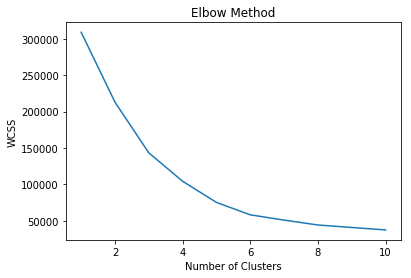

5. Utilisez ensuite la méthode _Silhouette_ pour voir si on peut affiner notre hypothèse pour ```k```

In [22]:
from sklearn.metrics import silhouette_score
for n_clusters in list (range(2,10)):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score (X, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.29307334005502633)
For n_clusters = 3, silhouette score is 0.383798873822341)
For n_clusters = 4, silhouette score is 0.4052954330641215)
For n_clusters = 5, silhouette score is 0.4402372958247734)
For n_clusters = 6, silhouette score is 0.45205475380756527)
For n_clusters = 7, silhouette score is 0.438510412713983)
For n_clusters = 8, silhouette score is 0.4294563708430266)
For n_clusters = 9, silhouette score is 0.41587023509207016)


For n_clusters = 2 The average silhouette_score is : 0.29307334005502633
For n_clusters = 3 The average silhouette_score is : 0.383798873822341
For n_clusters = 4 The average silhouette_score is : 0.4052954330641215
For n_clusters = 5 The average silhouette_score is : 0.4440669204743008
For n_clusters = 6 The average silhouette_score is : 0.45205475380756527


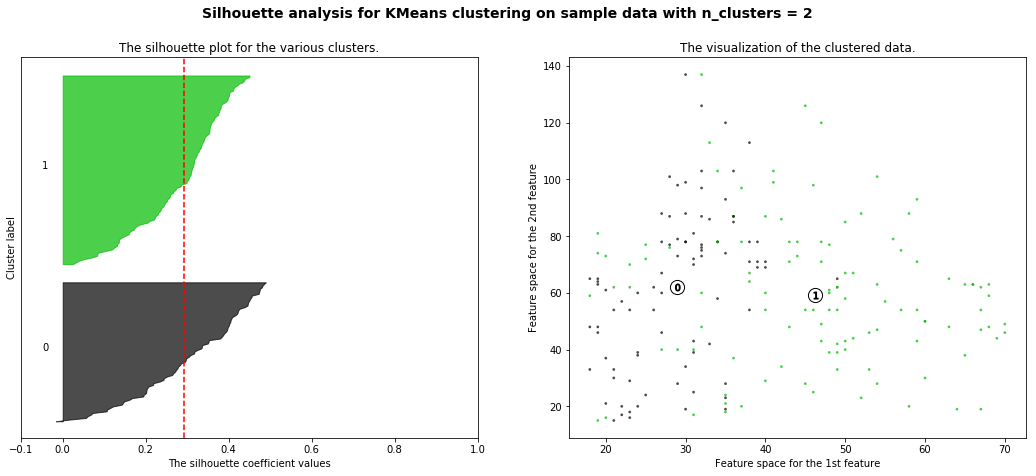

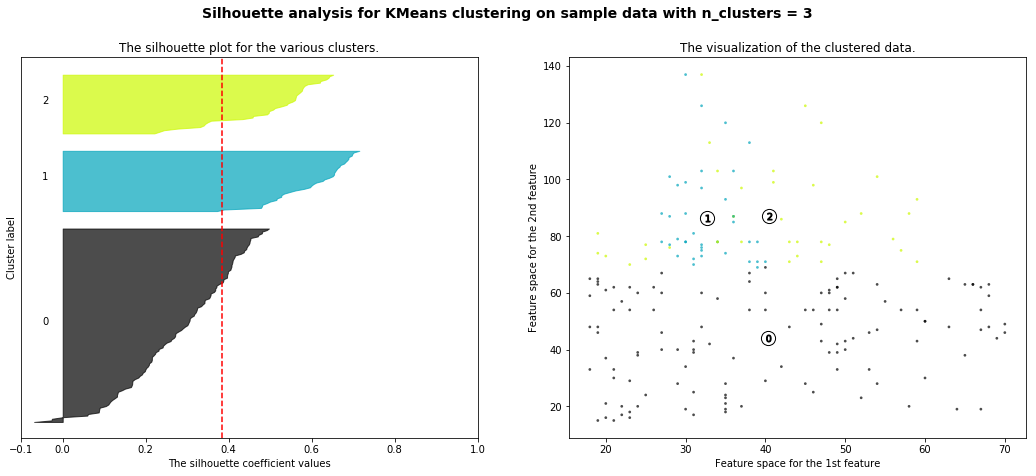

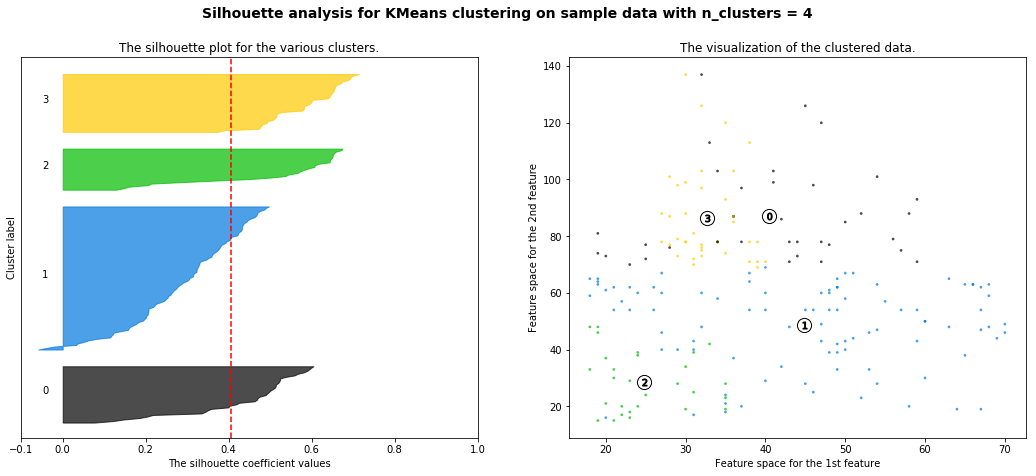

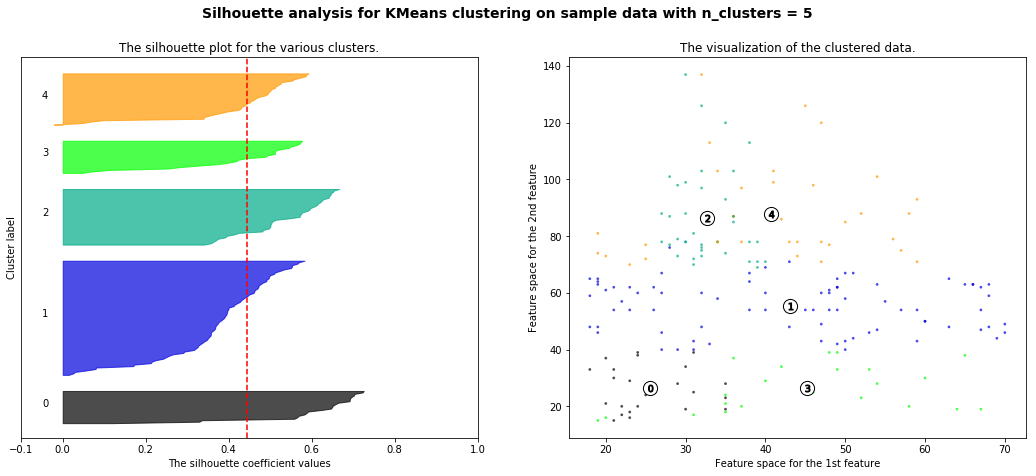

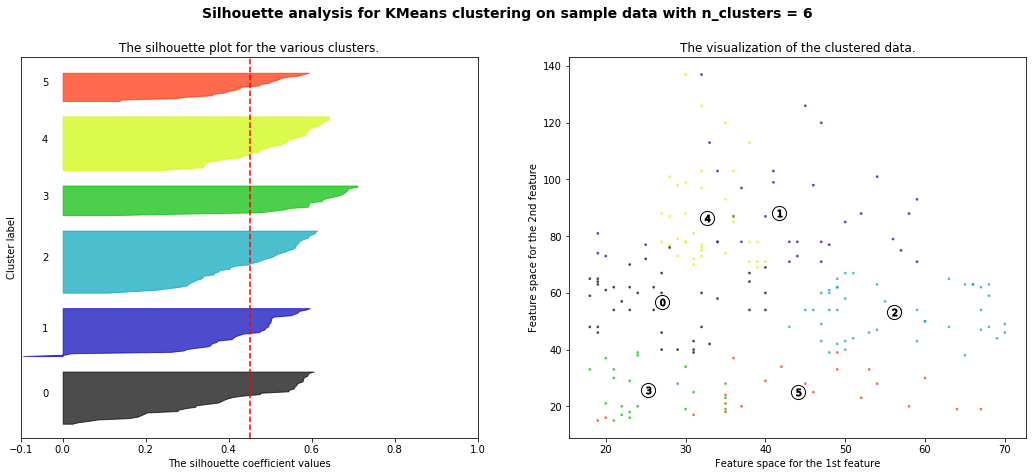

In [32]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
X=df.values

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
#X, y = make_blobs(n_samples=500,
#                  n_features=2,
#                  centers=4,
#                  cluster_std=1,
#                  center_box=(-10.0, 10.0),
#                  shuffle=True,
#                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.29307334005502633
For n_clusters = 3 The average silhouette_score is : 0.383798873822341
For n_clusters = 4 The average silhouette_score is : 0.4052954330641215
For n_clusters = 5 The average silhouette_score is : 0.4440669204743007
For n_clusters = 6 The average silhouette_score is : 0.45205475380756527
For n_clusters = 7 The average silhouette_score is : 0.43949619264530887


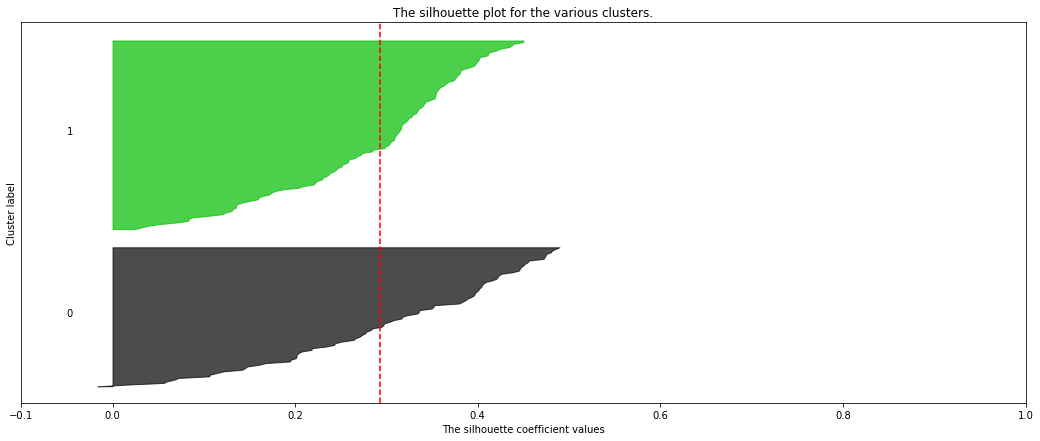

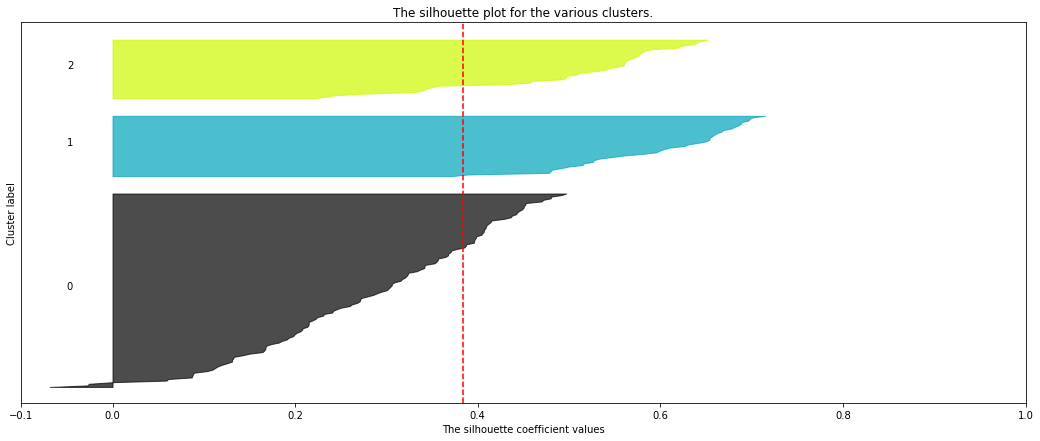

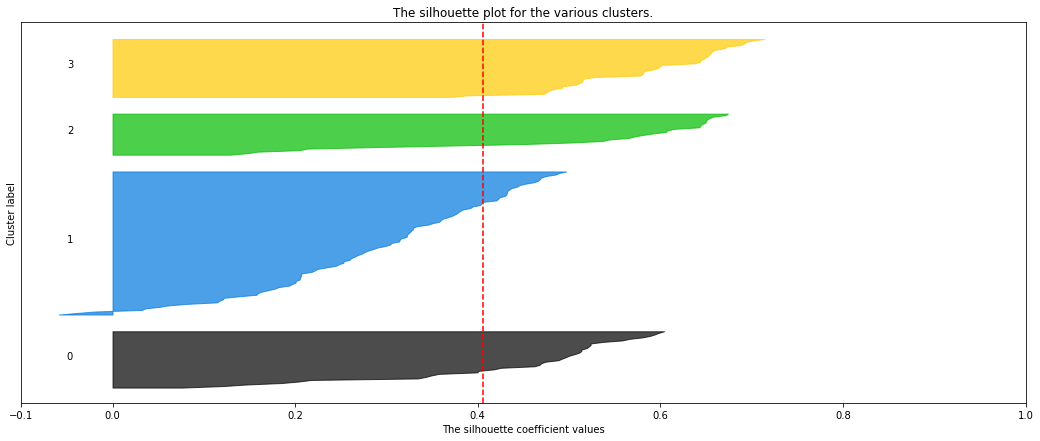

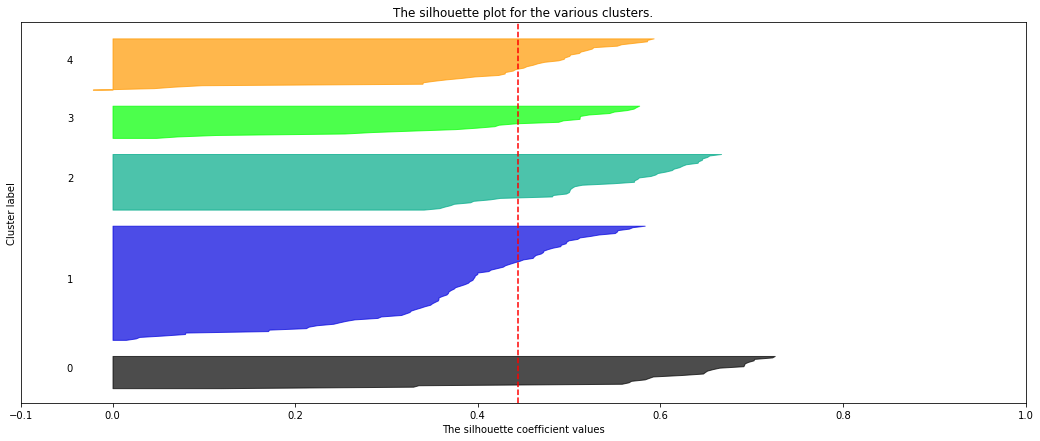

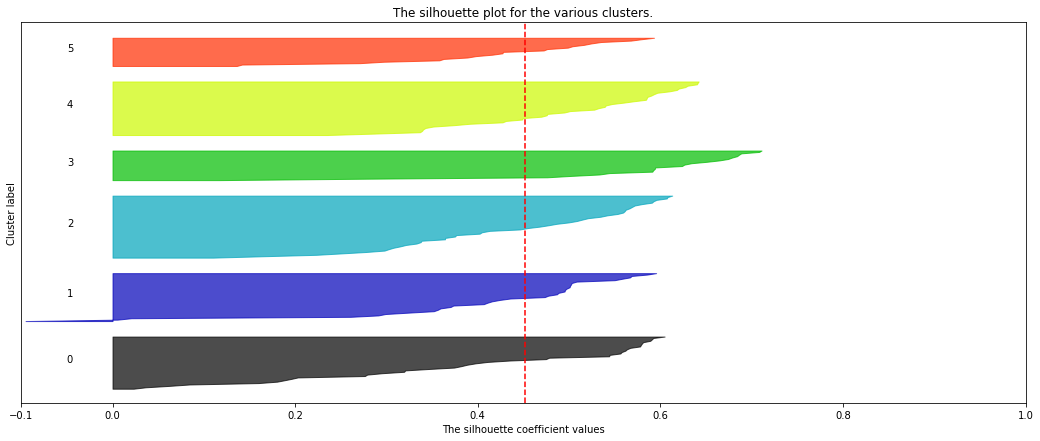

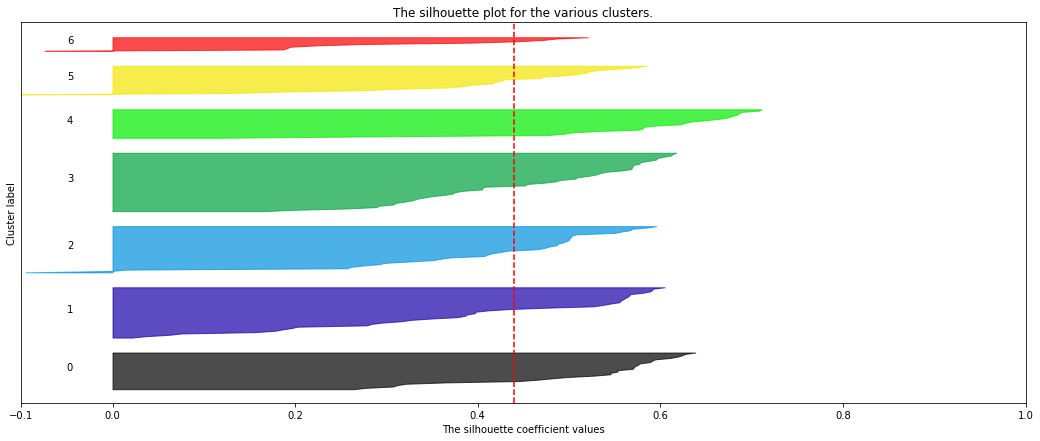

6. Pour la suite, nous allons prendre ```k=5``` clusters. Appliquez donc les KMeans sur votre dataset 

In [0]:
clusterer = KMeans (n_clusters=5)
preds = clusterer.fit_predict(X)
cent = clusterer.cluster_centers_
kmeans = pd.DataFrame(preds)
wh1 = df
wh1.insert((wh1.shape[1]),'kmeans',kmeans)

7. Créeons un graphique qui nous permettra de visualiser chacun des clusters ainsi que leur centroïds. On prendra d'abord le ```Spending Score``` comme ordonnée et le ```Annual Income``` en abscisse 

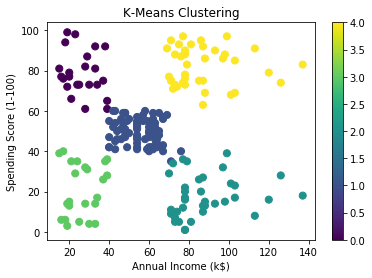

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['Annual Income (k$)'],wh1['Spending Score (1-100)'],
                     c=kmeans[0],s=50) 	
ax.set_title('K-Means Clustering')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
plt.colorbar(scatter)

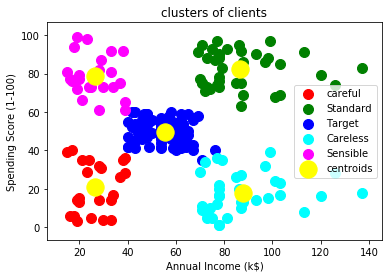

8. On a une jolie visualisation avec une belle séparation des clusters. Regardez cette fois la variable ```Age``` par rapport au ```Spending Score```. Que remarquez vous ?

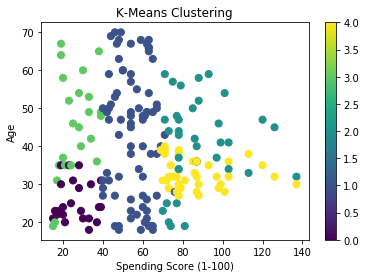

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['Annual Income (k$)'],wh1['Age'],
                     c=kmeans[0],s=50) 	
ax.set_title('K-Means Clustering')
ax.set_xlabel('Spending Score (1-100)')
ax.set_ylabel('Age')
plt.colorbar(scatter)

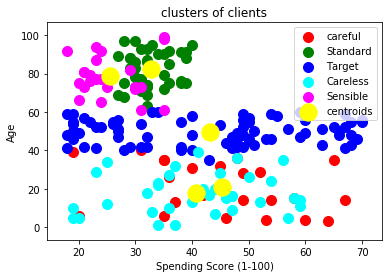